/var/folders/yp/yg3fb0191k710744lk484dsw0000gn/T/ipykernel_11257/4057948893.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


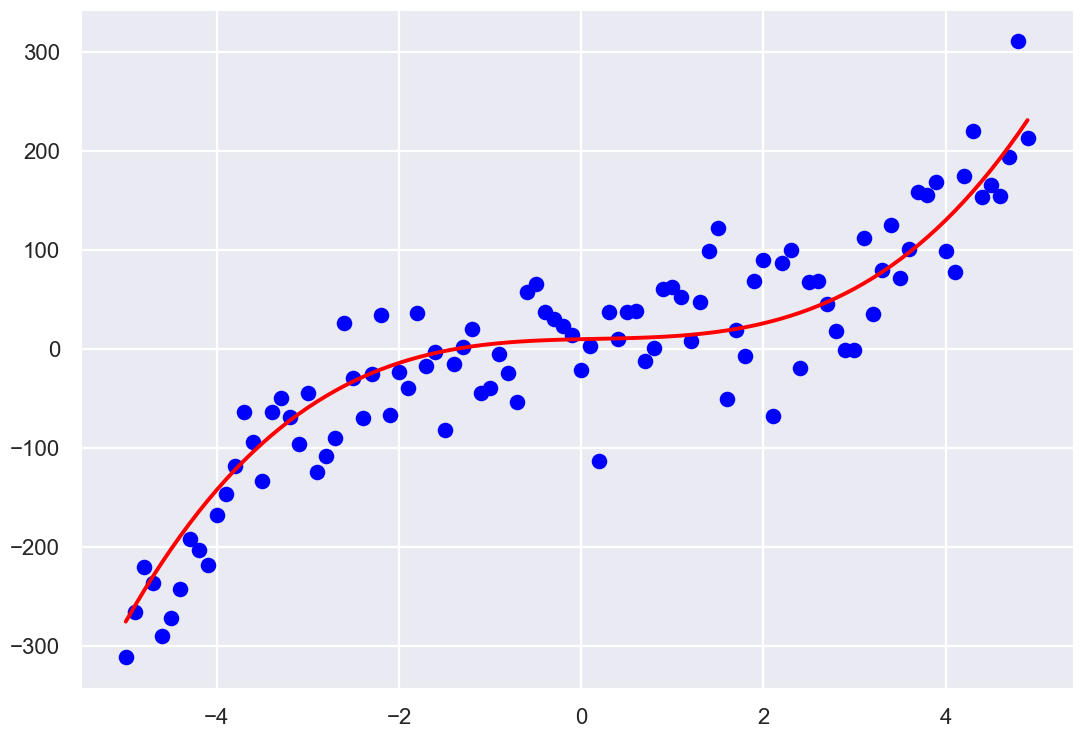

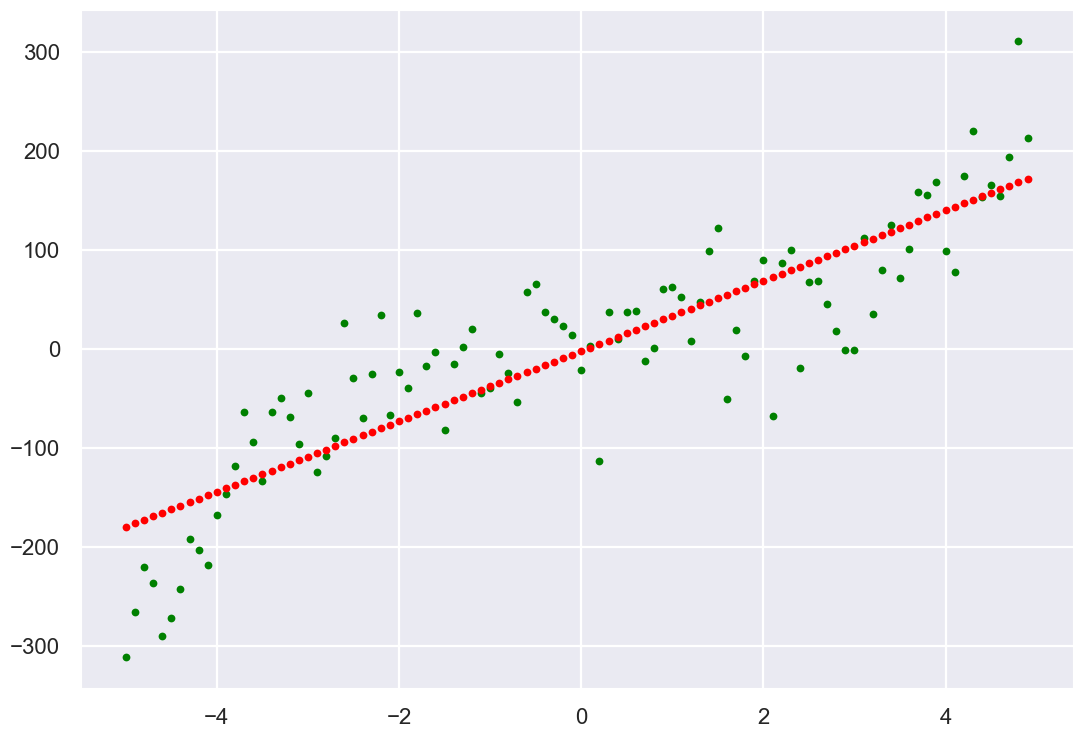

In [5]:
# Home work 1.2: Apply polynomial or nonlinear regression for data analysis by
# generating noisy points,
# using least square regression or pseudoinverse or optimize.curve_fit methods (on your choice)

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = np.arange(-5, 5, 0.1)
y = (2 * x**3) - x**2 + (2*x) + 10
noise = 40 * np.random.normal(size=x.size)
y_data = y + noise
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.show()


def func(x, a, b):
    y = a*x + b
    return y

#least square regression
A = np.vstack([x, np.ones(len(x))]).T
by = y_data[:, np.newaxis]
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y_data)
plt.plot(x, y_data, 'g.')
plt.plot(x, alpha[0]*x + alpha[1], 'r.')
plt.show()
